In [1]:
import pandas as pd
import numpy as np

In [2]:
#Data visualization package

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# Hide warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset

chatgpt_clean_df = pd.read_csv("Processed_Output.csv")

In [5]:
chatgpt_clean_df.head(2)

,tweet_created,text,lang,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,original_tweet,datetime,hour,word_count,clean_tweet,sentiment,compound,comp_score
0,2023-04-03 03:59:28+00:00,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,RT @DarrellLerner: ChatGPT Plugins are the fas...,2023-04-03 03:59:28+00:00,3,24,rt chatgpt plugins are the fastest way to get ...,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.6808,pos
1,2023-04-03 15:59:59+00:00,Get an intelligent chatbot for your website in...,en,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,Get an intelligent chatbot for your website in...,2023-04-03 15:59:59+00:00,15,47,get an intelligent chatbot for your website in...,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp...",0.4588,pos


In [6]:
#Checking for null data

chatgpt_clean_df.isna().sum()

tweet_created           0
text                    0
lang                    0
user_followers_count    0
user_following_count    0
user_tweet_count        0
user_verified           0
retweet_count           0
like_count              0
reply_count             0
impression_count        0
original_tweet          0
datetime                0
hour                    0
word_count              0
clean_tweet             0
sentiment               0
compound                0
comp_score              0
dtype: int64

**Converting Text to Features in Natural Language Processing**

In [7]:
# Define the input data and the target variable
X = chatgpt_clean_df['clean_tweet']
y = chatgpt_clean_df['comp_score']

**Count Vectorizer (Bag of Words)**

In sentiment analysis, Count Vectorizer is used to transform raw text data into numerical feature vectors, where each feature represents the count of a specific word or token in the text. These numerical vectors can then be fed into machine learning models, enabling them to learn and predict sentiment labels (e.g., positive, negative, neutral) based on the word frequencies in the text.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
#The code initializes a CountVectorizer object and then transforms the text data X into a matrix of token counts.
countvector = CountVectorizer()
X_transformed_count = countvector.fit_transform(X)
X_transformed_count

<19711x18269 sparse matrix of type '<class 'numpy.int64'>'
	with 336445 stored elements in Compressed Sparse Row format>

In [10]:
#The method retrieves the list of unique words or tokens identified by the CountVectorizer from the provided text data.
countvector.get_feature_names_out()

array(['aaa', 'aachen', 'aaliyah', ..., 'zulu', 'zunaira', 'zverev'],
      dtype=object)

In [11]:
#creating a new dataframe
countvector_inputdata = pd.DataFrame(X_transformed_count.toarray(), columns= countvector.get_feature_names_out())
countvector_inputdata

,aaa,aachen,aaliyah,aamer,aaron,aarty,aave,aayasomeone,ab,abandoned,...,zotero,zrioayoy,zscaler,zsp,zubairs,zuck,zuckerberg,zulu,zunaira,zverev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This method extracted 18269 unique words. The features represent the count of each word in a given tweet rather than its presence or absence.


**Term Frequency-Inverse Document Frequency (TF-IDF)**

In sentiment analysis, TF-IDF transforms text into numerical vectors by weighing words based on their significance in a document relative to an entire corpus. These weighted vectors serve as input features for machine learning models, enhancing their ability to discern sentiment by emphasizing contextually important words.

In [12]:
#Importing TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
#Creating the TfidfVectorizer object

tfidf_vectorizer = TfidfVectorizer(min_df=0.005) # filters out words that appear in fewer than 0.5% of the documents. It's more aggressive in excluding rare terms.


In [14]:
#Learning the vocabulary and calculating TF-IDF scores

X_transformed_tfidf = tfidf_vectorizer.fit_transform(X)
X_transformed_tfidf

<19711x458 sparse matrix of type '<class 'numpy.float64'>'
	with 227081 stored elements in Compressed Sparse Row format>

In [15]:
# Print the vocabulary and TF-IDF vectors for each document
tfidf_vectorizer.get_feature_names_out()

array(['about', 'academic', 'access', 'according', 'account', 'accounts',
       'actually', 'add', 'advanced', 'after', 'against', 'ago', 'ai',
       'aipowered', 'airdrop', 'all', 'almost', 'already', 'also', 'am',
       'amazing', 'amp', 'an', 'and', 'announce', 'another', 'answer',
       'answers', 'any', 'anyone', 'anything', 'api', 'app', 'arb', 'are',
       'art', 'article', 'artificial', 'as', 'ask', 'asked', 'asking',
       'assistant', 'at', 'autogpt', 'available', 'back', 'bad', 'based',
       'be', 'because', 'been', 'before', 'behind', 'being', 'believe',
       'best', 'better', 'bhai', 'big', 'bing', 'bot', 'build',
       'building', 'built', 'bullish', 'business', 'but', 'by', 'call',
       'called', 'can', 'cannot', 'canva', 'change', 'changes', 'chat',
       'chatbot', 'chatgpt', 'chatgpts', 'check', 'cherry', 'chrome',
       'citations', 'claim', 'code', 'coding', 'come', 'coming',
       'comment', 'community', 'companies', 'company', 'complete',
       'c

In [16]:
#storing into a new dataframe
tfidf_inputdata = pd.DataFrame(X_transformed_tfidf.toarray(), columns= tfidf_vectorizer.get_feature_names_out())
tfidf_inputdata

,about,academic,access,according,account,accounts,actually,add,advanced,after,...,years,yet,ygpt,yield,you,your,youre,yourself,youtube,zsp
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.183268,0.000000,0.0,0.000000,0.0,0.00000
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.225901,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.397023,0.0,0.000000,0.0,0.00000
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.199632,0.000000,0.000000,0.0,0.000000,0.0,0.20095
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000
4,0.000000,0.342752,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19706,0.243080,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.175746,0.000000,0.0,0.000000,0.0,0.00000
19707,0.264318,0.000000,0.362896,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.390171,0.0,0.00000
19708,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.349608,0.000000,0.158112,0.000000,0.0,0.000000,0.0,0.00000
19709,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000


Both TFIDF and CountVectorizer  identified unique tokens in the dataset, but they represent these tokens differently since TFIDF provides weighted counts, where the weights diminish for words that appear in many documents. On other hand, Countvectorizer provides raw counts of the tokens.

In [17]:
#Printing the number of feature words

print('No. of feature_words: ', len(tfidf_vectorizer.get_feature_names_out()))

No. of feature_words:  458


In [18]:
from sklearn.model_selection import train_test_split

We will be using TFIDF since it reduces noise by filtering out very rare words, which might be typos or words that are not meaningful for the analysis. This can lead to faster training times and models that generalize better.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_inputdata,y, test_size = 0.2, random_state = 42)

In [20]:
y_train.value_counts()


pos    7432
neu    5227
neg    3109
Name: comp_score, dtype: int64

In [21]:
# Print the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15768, 458)
y_train shape: (15768,)
X_test shape: (3943, 458)
y_test shape: (3943,)


**SMOTE**

SMOTE, which stands for Synthetic Minority Over-sampling Technique, is an oversampling technique used to handle class imbalance in datasets. This is to  to address class imbalance by creating synthetic samples in the feature space.

In [22]:
#pip install -U scikit-learn
!pip install imblearn

In [23]:
from imblearn.over_sampling import SMOTE


In [24]:
SMOTE = SMOTE(random_state = 1)

In [25]:
X_train_SMOTE , y_train_SMOTE = SMOTE.fit_resample(X_train , y_train)

In [26]:
y_train_SMOTE.value_counts()

neu    7432
neg    7432
pos    7432
Name: comp_score, dtype: int64

**Model 1 - Linear Support Vector Classifier (SVC)**


LinearSVC is a linear Support Vector Classification (SVC) algorithm in scikit-learn. It is a variant of the SVM algorithm, specifically designed for linearly separable datasets.

In [27]:
# Import the required module
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [28]:
# Define the SVC model
SVC_model = LinearSVC(random_state=2)

# Fit the model
SVC_model.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
SVC_predict = SVC_model.predict(X_test)

In [29]:
# Compute the accuracy of the model
svc_acc = accuracy_score(y_test, SVC_predict)*100
svc_acc

69.79457266041086

In [30]:
#Using CalibratedClassifierCV to calibrate the classifier and get probabilities

from sklearn.calibration import CalibratedClassifierCV

calibrated_svc = CalibratedClassifierCV(base_estimator=LinearSVC(), method='sigmoid')
calibrated_svc.fit(X_train_SMOTE, y_train_SMOTE)
SVC_predict_proba = calibrated_svc.predict_proba(X_test)


**Model 2 - K-Nearest Neighbors (KNN) classifier**

In sentiment analysis, the K-Nearest Neighbors (KNN) classifier predicts the sentiment of a text by examining the sentiments of its closest texts from the training dataset. The proximity between texts is determined using distance metrics in vector spaces created by methods like TF-IDF or Count Vectorizer.

In [31]:
#Importing the library
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Define the KNN model
KNN_model=KNeighborsClassifier()

# Fit the model
KNN_model.fit(X_train_SMOTE,y_train_SMOTE)

# Make predictions
KNN_predict = KNN_model.predict(X_test)

# Compute the accuracy of the model
knn_acc = accuracy_score(y_test,KNN_predict)*100
knn_acc

62.71874207456251

In [33]:
KNN_predict_proba = KNN_model.predict_proba(X_test)

**Model 3- Random Forest**

Random Forest is an ensemble learning method used in sentiment analysis that builds multiple decision trees and merges their outputs for more accurate and stable predictions. Its ability to handle large data sets, manage feature interactions, and provide feature importance rankings makes it a powerful tool for gauging the significance of terms in sentiment classification.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Define the Random Forest model
RF_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model
RF_model.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
RF_predict = RF_model.predict(X_test)

# Compute the accuracy of the model
rf_acc = accuracy_score(y_test, RF_predict)*100
rf_acc

81.00431143799138

In [36]:
RF_predict_proba = RF_model.predict_proba(X_test)

**Model 4 - Naive Bayes**

In sentiment analysis, Naive Bayes classifies text by calculating the probability of a sentiment label given the words in the text, leveraging Bayes' theorem. The model assumes that each word affects sentiment independently, allowing for efficient and often effective sentiment predictions.

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
# Define the Naive Bayes model
NB_model = MultinomialNB()

# Fit the model
NB_model.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
NB_predict = NB_model.predict(X_test)

# Compute the accuracy of the model
nb_accuracy = accuracy_score(y_test, NB_predict)*100
nb_accuracy

63.60639107278722

In [39]:
NB_predict_proba = NB_model.predict_proba(X_test)

**Model 5 - Logistic Regression**

Logistic regression is a widely-used supervised learning algorithm in sentiment analysis to predict the probability of a given text being positive or negative by modeling the relationship between its features and the sentiment label. Its output can be thresholded to classify sentiments and provide interpretability by assigning weights to individual words or n-grams, indicating their influence on the sentiment.

In [40]:
#Importing library for logistic regression

from sklearn.linear_model import LogisticRegression

In [41]:
# Define the Logistic Regression model

logreg_model = LogisticRegression(max_iter=1000,random_state=5)

# Fit the model
logreg_model.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
logreg_predict = logreg_model.predict(X_test)

# Compute the accuracy of the model
logreg_accuracy = accuracy_score(y_test, logreg_predict)*100
logreg_accuracy


70.32716205934567

In [42]:
logreg_predict_proba = logreg_model.predict_proba(X_test)

**Model 6 - Decision Tree Classifier**

Decision Tree Classifiers in sentiment analysis offer clear interpretability, highlighting influential words or phrases that determine sentiment. Their flexibility allows them to handle both numerical and categorical data, and they can capture non-linear relationships in text data. However, while they require minimal data preprocessing, they can overfit and might be biased towards dominant sentiment classes.

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Define the Decision Tree model
DT_model = DecisionTreeClassifier()

# Fit the model
DT_model.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
DT_predict = DT_model.predict(X_test)

# Compute the accuracy of the model
DT_accuracy = accuracy_score(y_test, DT_predict)*100
DT_accuracy


76.46462084707076

In [45]:
DT_predict_proba = DT_model.predict_proba(X_test)

**Model results and accuracies**

In [46]:
## models and accuracies
results = [['Linear_Support_Vector_Classication (SVC)', svc_acc],
           ['K_Nearest_Neighbour', knn_acc],
           ['Random_Forest', rf_acc],
           ['Naive_Bayes_Classifier', nb_accuracy],
           ['Logistic_Regression', logreg_accuracy],
           ['Decision_Tree_Classifier', DT_accuracy]]
pd.DataFrame(results,columns=['Model','Accuracy'])

,Model,Accuracy
0,Linear_Support_Vector_Classication (SVC),69.794573
1,K_Nearest_Neighbour,62.718742
2,Random_Forest,81.004311
3,Naive_Bayes_Classifier,63.606391
4,Logistic_Regression,70.327162
5,Decision_Tree_Classifier,76.464621


The accuracy scores indicate that the ensemble approach of Random Forest, which builds multiple decision trees and aggregates their results, is effectively capturing the complexities and patterns of the sentiment in the dataset. The inherent ability of Random Forest to handle overfitting, bias, and variance better than a single decision tree likely contributes to its superior performance.

**Confusion Matrix and Classification report for Random Forest**

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
confusion_matrix(y_test, RF_predict)

array([[ 539,   89,  184],
       [  32, 1077,  192],
       [  92,  160, 1578]])

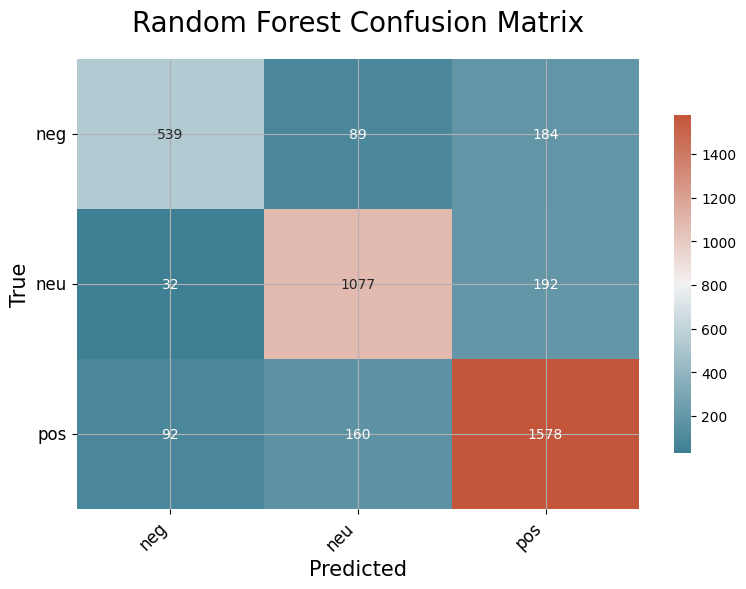

In [49]:
#Confusion matrix using raw counts
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot()

# Use a diverging color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(confusion_matrix(y_test, RF_predict), annot=True, ax=ax, fmt='g', cmap=cmap, cbar_kws={"shrink": 0.75})

# Labels, title, and ticks
labels = RF_model.classes_

# Improve the font size and positioning
ax.set_xlabel('Predicted', fontsize=15, position=(0.5, 20))
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45, ha="right", fontsize=12)  # rotate ticks and set alignment
ax.xaxis.set_ticklabels(labels)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(labels)
plt.yticks(rotation=0, fontsize=12)

plt.title('Random Forest Confusion Matrix', fontsize=20, pad=20)

# Display grid lines for clarity
ax.grid(True)

plt.tight_layout()

# Save the plot
plt.savefig("rf_confusion_matrix1.png")

plt.show()

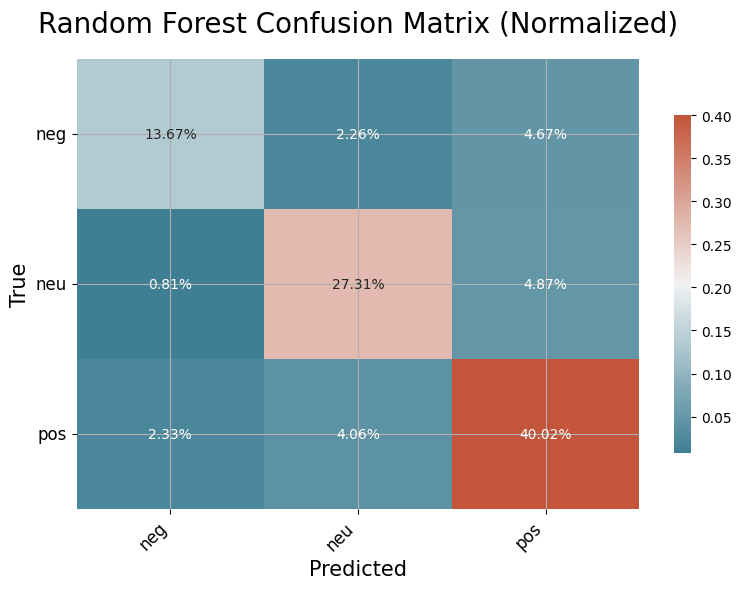

In [50]:
#Confusion matrix using percentage

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot()

# Use a diverging color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Normalize the confusion matrix
normalized_cm = confusion_matrix(y_test, RF_predict) / np.sum(confusion_matrix(y_test, RF_predict))

sns.heatmap(normalized_cm, annot=True, ax=ax, fmt='.2%', cmap=cmap, cbar_kws={"shrink": 0.75})

# Labels, title, and ticks
labels = RF_model.classes_

# Improve the font size and positioning
ax.set_xlabel('Predicted', fontsize=15, position=(0.5, 20))
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45, ha="right", fontsize=12)  # rotate ticks and set alignment
ax.xaxis.set_ticklabels(labels)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(labels)
plt.yticks(rotation=0, fontsize=12)

plt.title('Random Forest Confusion Matrix (Normalized)', fontsize=20, pad=20)

# Display grid lines for clarity
ax.grid(True)

plt.tight_layout()

# Save the plot
plt.savefig("rf_confusion_matrix2.png")

plt.show()


In [51]:
names = RF_model.classes_
print(classification_report(y_test, RF_predict, target_names=names))

              precision    recall  f1-score   support

         neg       0.81      0.66      0.73       812
         neu       0.81      0.83      0.82      1301
         pos       0.81      0.86      0.83      1830

    accuracy                           0.81      3943
   macro avg       0.81      0.78      0.79      3943
weighted avg       0.81      0.81      0.81      3943



**ROC curve**

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

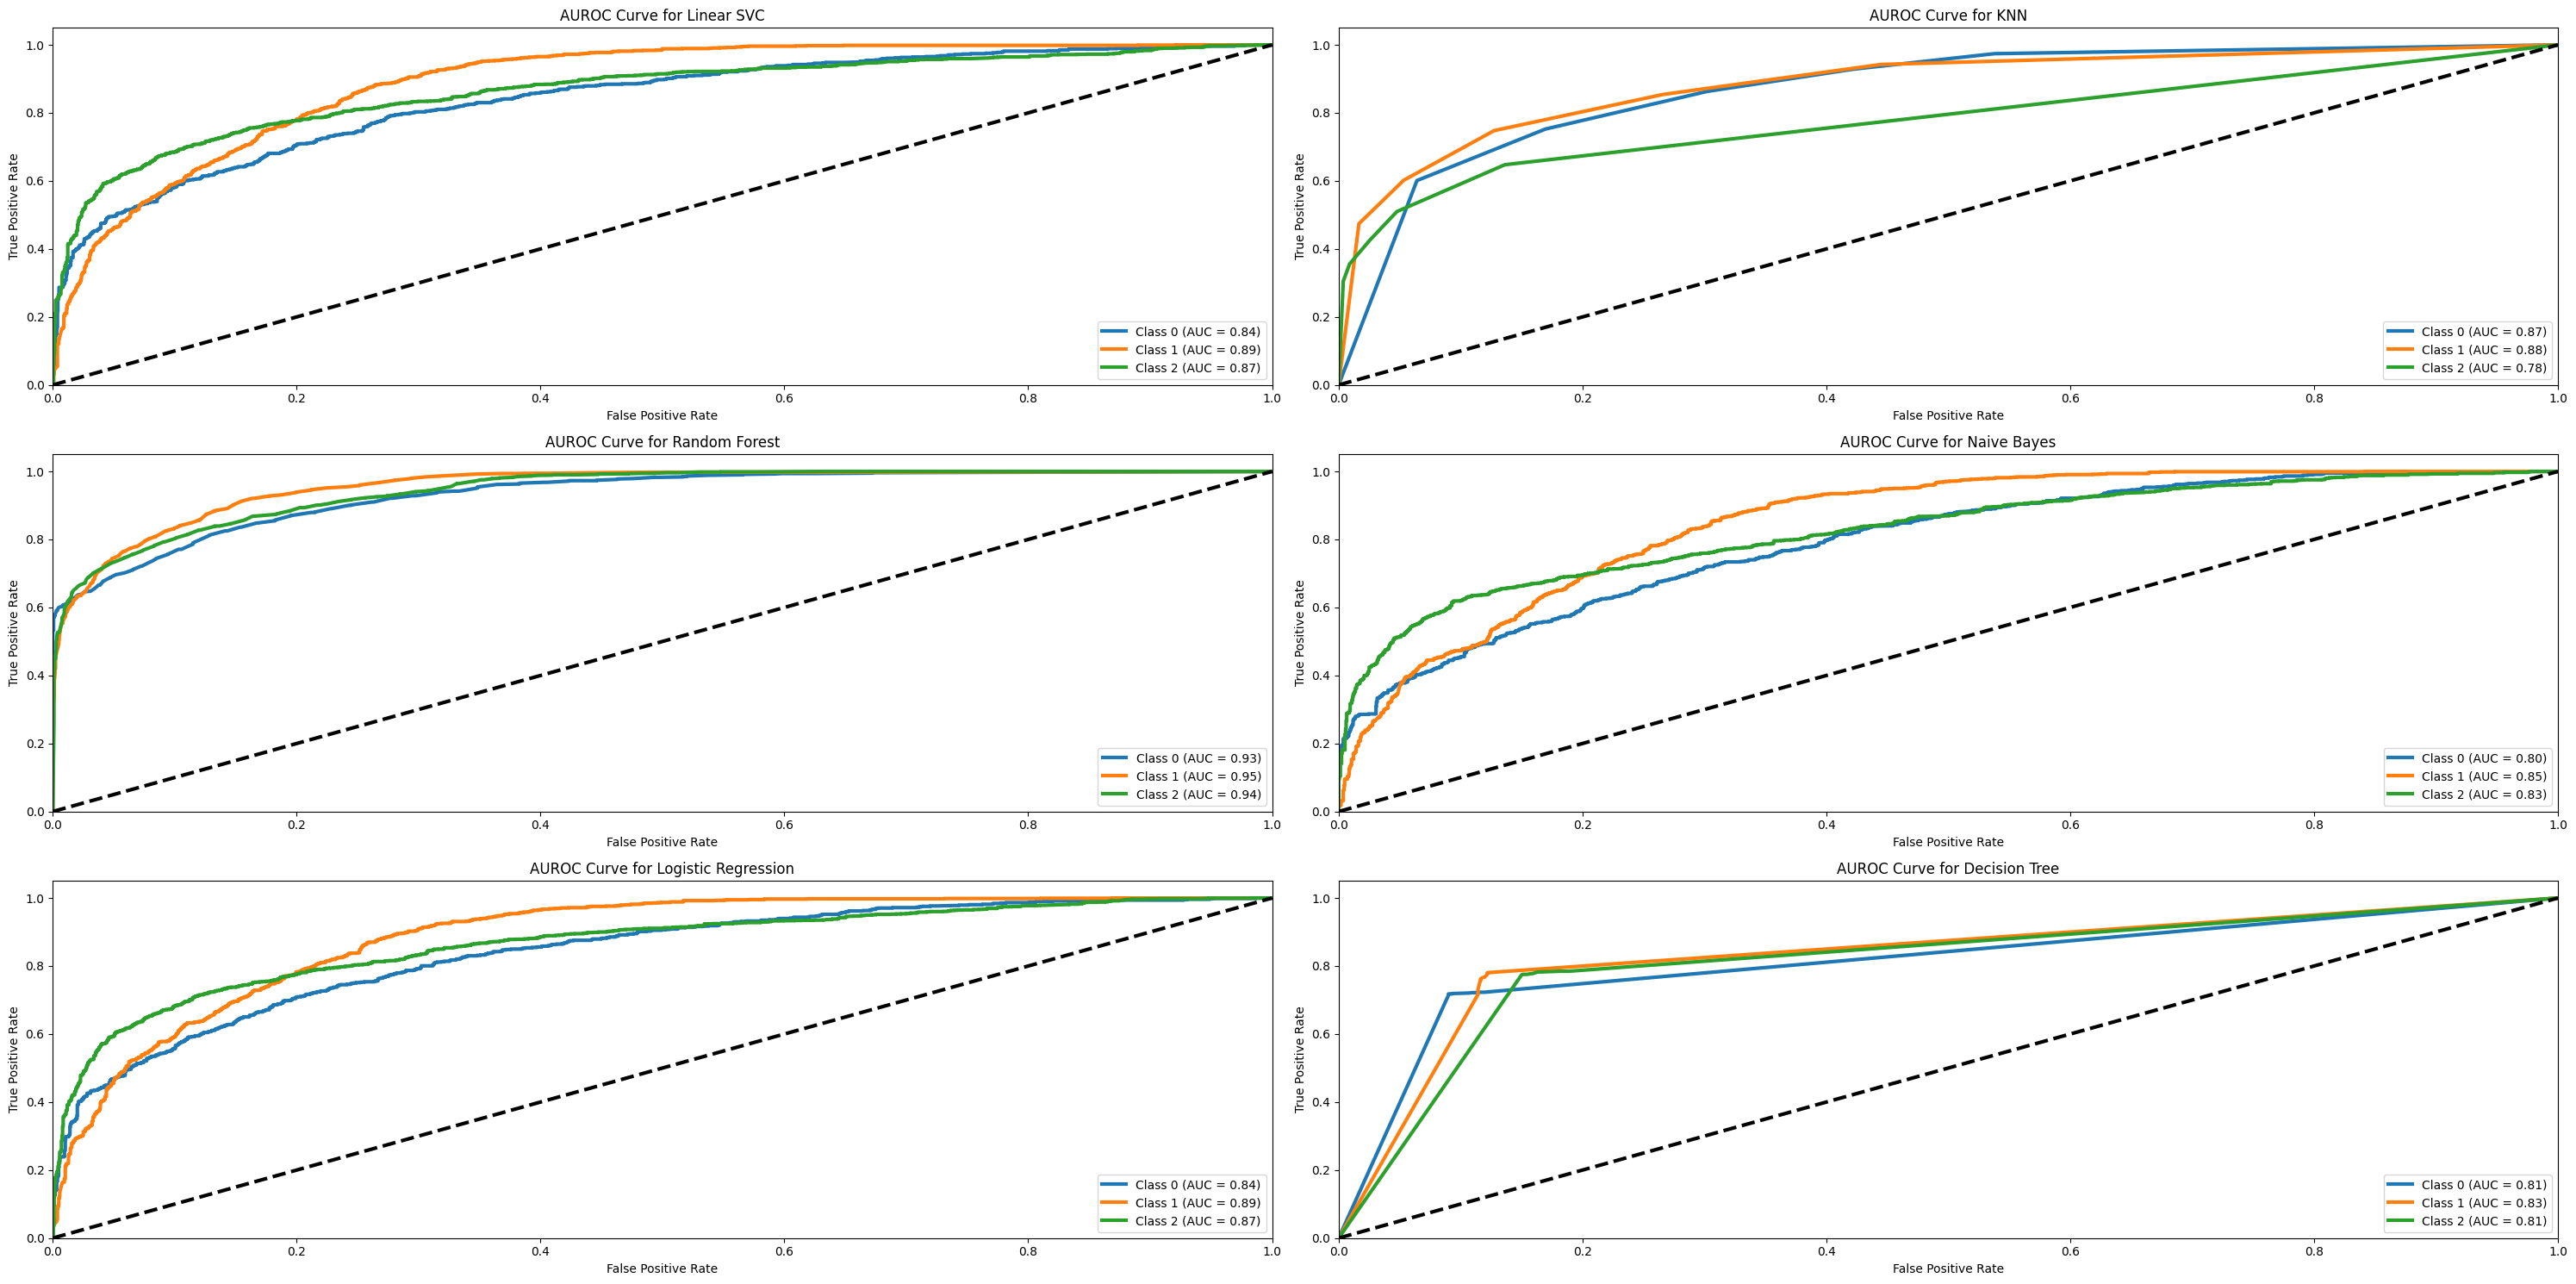

In [53]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

figure, axes = plt.subplots(3,2, sharex=False, figsize=(30,15))
n_classes=3
y_onehot = pd.get_dummies(y_test, SVC_model.classes_) # Assuming the classes are well-defined in y_test

# Function to plot ROC for a given model's predictions
def plot_roc(y_true, y_scores, title, ax):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true.iloc[:, i], y_scores[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], lw=3, label="Class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]))
    ax.plot([0, 1], [0, 1], "k--", lw=3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(title)
    ax.legend(loc="lower right")

# Plotting each model's ROC curve
plot_roc(y_onehot, SVC_predict_proba, "AUROC Curve for Linear SVC", axes[0,0])
plot_roc(y_onehot, KNN_predict_proba, "AUROC Curve for KNN", axes[0,1])
plot_roc(y_onehot, RF_predict_proba, "AUROC Curve for Random Forest", axes[1,0])
plot_roc(y_onehot, NB_predict_proba, "AUROC Curve for Naive Bayes", axes[1,1])
plot_roc(y_onehot, logreg_predict_proba, "AUROC Curve for Logistic Regression", axes[2,0])
plot_roc(y_onehot, DT_predict_proba, "AUROC Curve for Decision Tree", axes[2,1])

plt.tight_layout()

# Save the plot
plt.savefig("AUROC.png")

plt.show()



Looking at Random Forest, we can interpret AUC as below:

**Class 0 (AUC = 0.93):**
This indicates that the model has a very high ability to distinguish between class 0 and the other classes. An AUC of 0.93 is considered excellent, meaning that there is a 93% chance that the model will be able to distinguish between a randomly chosen positive instance (from class 0) and a randomly chosen negative instance (from the other classes).

**Class 1 (AUC = 0.95):**
This indicates an excellent ability of the model to discriminate between class 1 and the other classes.

**Class 2 (AUC = 0.94):**
This is indicating a very high ability of the model to differentiate between class 2 and the rest.

All three AUC values are quite high, suggesting that the model is performing very well in distinguishing between the classes. This model seems to have a consistent and strong performance across all three classes.

**Prediction on the Sample Text using Random Forest**

In [54]:
text=input('Enter the text')

Enter the textgood


In [55]:
tfidf_vectorizer.transform([text])

<1x458 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [56]:
RF_model.predict(tfidf_vectorizer.transform([text]))

array(['pos'], dtype=object)